 
  <img src="https://th.bing.com/th/id/R.3cd1c8dc996c5616cf6e65e20b6bf586?rik=09aaLyk4hfbBiQ&riu=http%3a%2f%2fcidics.uanl.mx%2fwp-content%2fuploads%2f2016%2f09%2fcimat.png&ehk=%2b0brgMUkA2BND22ixwLZheQrrOoYLO3o5cMRqsBOrlY%3d&risl=&pid=ImgRaw&r=0" 
     style="float: right; margin-right: 30px;" 
     width="120"
     />

 ---
 
 # **OPTIMIZACIÓN: TAREA 2**
 EZAU FARIDH TORRES TORRES.
     
<p align="right"> Maestría en Ciencias con Orientación en Matemáticas Aplicadas. </p>
<p align="right"> CENTRO DE INVESTIGACIÓN EN MATEMÁTICAS. </p>

---

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "dark")

---

# **1.- Ejercicio 1:**

---

Estimar la cantidad de iteraciones que requiere el algoritmo de descenso máximo con paso exacto para alcanzar el minimizador $\mathbf{x}_*$ de la función cuadrática 

$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}  $$ 

donde $\mathbf{A}$ es una matriz simétrica y definida positiva que su información y la del arreglo $\mathbf{b}$ está almacenada en archivo en formato `npz` contenido en el archivo `datosTarea02.zip`.

Para hacer esto, calculamos el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$ y definimos

$$q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*}).$$

Sabemos que $q(\mathbf{x})$ y $f(\mathbf{x})$ sólo difieren en una constante y podemos usar $q(\mathbf{x})$ para estimar la manera en que decrece la función mediante el resultado de la Proposición 6 de la Clase 6:

$$ q(\mathbf{x}_{k+1}) \leq \left(\frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{ \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} \right)^2 q(\mathbf{x}_k). $$ 

Si 
   
$$ c = \frac{\lambda_{\max}(\mathbf{A})-\lambda_{\min}(\mathbf{A})}{ \lambda_{\max}(\mathbf{A})+\lambda_{\min}(\mathbf{A})} , $$ 
    
entonces 

$$ q(\mathbf{x}_{k+1}) \leq c^2 q(\mathbf{x}_k) \leq c^4 q(\mathbf{x}_{k-1}) \leq c^6 q(\mathbf{x}_{k-2}) \leq ... \leq c^{2k} q(\mathbf{x}_{1}) \leq c^{2(k+1)} q(\mathbf{x}_{0}). $$

Como 
$$2q(\mathbf{x}_k) =  (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})
=  \|\mathbf{x}-\mathbf{x}_{*}\|^2_{\mathbf{A}},  $$ 

$q(\mathbf{x}_k)$ es una medida de la distancia al cuadrado de $\mathbf{x}_k$ a $\mathbf{x}_{*}$, de modo dada una tolerancia $\tau>0$ podemos buscar el valor $k$ para el cual se cumpla

$$ \|\mathbf{x}_k-\mathbf{x}_{*}\|_{\mathbf{A}} = \sqrt{2q(\mathbf{x}_k)} \leq c^k \sqrt{2q(\mathbf{x}_0)} < \tau $$

y ese $k$ es la estimación de la cantidad de iteraciones que requiere el algoritmo.

## **1.1.-**

Escriba una función que reciba como parámetro el nombre de un archivo  `npz`, lea el archivo y cree la matriz $\mathbf{A}$ y el vector $\mathbf{b}$  del archivo `npz`, y calcule el minimizador $\mathbf{x}_{*}$ de $f(\mathbf{x})$ resolviendo el sistema de ecuaciones $\mathbf{A}\mathbf{x}_{*} = \mathbf{b}$. Use la factorización de Cholesky para resolver el sistema de ecuaciones y de esta manera saber si la matriz es definida positiva, y en este caso devolver $\mathbf{A}$, $\mathbf{b}$ y $\mathbf{x}_{*}$. En caso contrario devolver $\mathbf{A}$, $\mathbf{b}$ y $None$.

In [2]:
def sol_Chol(archivo: str):
    npzfile = np.load(archivo)
    A  = npzfile['arr_0']
    b  = npzfile['arr_1']
    try:
        Lc = np.linalg.cholesky(A)
        y = np.linalg.solve(Lc,b)
        x = np.linalg.solve(Lc.T, y)
        return A, b, x
    except np.linalg.LinAlgError as error:
        print('La matriz no es definida positiva', error)
        return A, b, None

## **1.2.-**

Programe la función que evalua la función $q(\mathbf{x}) = \frac{1}{2} (\mathbf{x}-\mathbf{x}_{*})^\top\mathbf{A}(\mathbf{x}-\mathbf{x}_{*})$. La función recibe como parámetros el punto $\mathbf{x}$, la matriz $\mathbf{A}$ y el punto $\mathbf{x}_{*}$
   y devolver el valor de $q(\mathbf{x})$.

In [3]:
def q(x: np.array, A:np.array, x_est: np.array):
    return 0.5*np.transpose(x - x_est) @ A @ (x - x_est)

## **1.3.-**

Programe una función estima la cantidad de iteraciones que el algoritmo requiere. Esta función recibe como argumentos la matriz $\mathbf{A}$, el punto $\mathbf{x}_0$, el punto $\mathbf{x}_*$ y una tolerancia $\tau>0$. La función calcula la cantidad $c$ descrita anteriormente y determina el entero $k$ que cumple con $c^k \sqrt{2q(\mathbf{x}_0)} < \tau$. La función debe devolver $k$ y $c$.

> De la ecuación $c^k \sqrt{2q(\mathbf{x}_0)} < \tau$ podemos despejar $k$: $c^k < \tau / \sqrt{2q(\mathbf{x}_0)}$ para $2q(\mathbf{x}_0) \neq 0$. Aplicando logaritmo, al ser monótona:
>$$
>\ln{(c^{k})} < \ln{\frac{\tau}{\sqrt{2q(\mathbf{x}_0)}}}
>$$
>$$
>k \ln{c} < \ln{\frac{\tau}{\sqrt{2q(\mathbf{x}_0)}}}
>$$
>Como $0< c < 1$, entonces:
>$$
>k > \frac{\ln{\frac{\tau}{\sqrt{2q(\mathbf{x}_0)}}}} { \ln{c}}
>$$
> Basta tomar:
>$$
>k = \left \lceil{ \frac{\ln{\frac{\tau}{\sqrt{2q(\mathbf{x}_0)}}}} { \ln{c}} } \right \rceil
>$$
>Se define la función a continuación:
>

In [4]:
def iteraciones(A: np.array, x0: np.array, x_est: np.array, tol: float):
    eigenvalores = np.linalg.eigvals(A)
    lb_max = np.max(eigenvalores)
    lb_min = np.min(eigenvalores)
    c = (lb_max - lb_min) / (lb_max + lb_min)
    k = np.ceil(np.log(tol / np.sqrt(2*q(x = x0, A = A, x_est = x_est))) / np.log(c))
    return int(k), c

## **1.4.-**

Pruebe la función del punto anterior usando los datos de cada archivo `npz` contenidos en el archivo `datosTarea02.zip`. Use la función del Punto 1 y si se pudo calcular $\mathbf{x}_{*}$, defina $n$ como el tamaño del vector $\mathbf{b}$, el  punto inicial $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$ y ejecute la función del Punto 3 usando como tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$  es el épsilon de la máquina.
   
Imprima el valor $n$, $q(\mathbf{x}_0)$, $k$, $c$.

### **1.4.1.-**

In [5]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A1, b1, x_est1 = sol_Chol(archivo = "datosTarea02/matA_vecb1.npz")
n1 = len(b1)
x01 = 10*np.ones(n1)

k1, c1 = iteraciones(A = A1, x0 = x01, x_est = x_est1, tol = tau)
print('n     =', n1)
print('q(x0) =', q(x = x01, A = A1, x_est = x_est1))
print('k     =', k1)
print('c     =', c1)

n     = 2
q(x0) = 1113.15
k     = 54
c     = 0.6666666666666666


### **1.4.2.-**

In [6]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A2, b2, x_est2 = sol_Chol(archivo = "datosTarea02/matA_vecb2.npz")
n2 = len(b2)
x02 = 10*np.ones(n2)

k2, c2 = iteraciones(A = A2, x0 = x02, x_est = x_est2, tol = tau)
print('n     =', n2)
print('q(x0) =', q(x = x02, A = A2, x_est = x_est2))
print('k     =', k2)
print('c     =', c2)

n     = 10
q(x0) = 2658.8249999999994
k     = 150
c     = 0.8610359125293415


### **1.4.3.-**

In [7]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A3, b3, x_est3 = sol_Chol(archivo = "datosTarea02/matA_vecb3.npz")
n3 = len(b3)
x03 = 10*np.ones(n3)

k3, c3 = iteraciones(A = A3, x0 = x03, x_est = x_est3, tol = tau)
print('n     =', n3)
print('q(x0) =', q(x = x03, A = A3, x_est = x_est3))
print('k     =', k3)
print('c     =', c3)

n     = 100
q(x0) = 18134.27
k     = 8
c     = 0.041755326694689676


### **1.4.4.-**

In [8]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A4, b4, x_est4 = sol_Chol(archivo = "datosTarea02/matA_vecb4.npz")
n4 = len(b4)
x04 = 10*np.ones(n4)

k4, c4 = iteraciones(A = A4, x0 = x04, x_est = x_est4, tol = tau)
print('n     =', n4)
print('q(x0) =', q(x = x04, A = A4, x_est = x_est4))
print('k     =', k4)
print('c     =', c4)

n     = 500
q(x0) = 543978.79
k     = 276
c     = 0.9132114471426361


---

# **2.- Ejercicio 2:**

---

Programe el Algoritmo 2 de la Clase 5 para optimizar funciones cuadráticas de la forma
$$ f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}.$$
con el método de descenso máximo con paso exacto.

## **2.1.-**

La función que implementa el algoritmo recibe como argumentos:
- la matriz $\mathbf{A}$ (que se supone que es simétrica y definida positiva), 
- el vector $\mathbf{b}$ de la función cuadrática,
- un punto inicial $\mathbf{x}_{0}$ 
- una tolerancia $\tau$ y 
- el número máximo de iteraciones $N$.

La función debe devolver:
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por 
  cumplirse la condición de paro ($\|\alpha_k \mathbf{g}_{k}\| < \tau$) o
  $False$ si termina porque se alcanzó el número máximo de iteraciones.

In [48]:
def desc_max_quad(A:np.array, b: np.array, x0: np.array, tol: float, iter: int):
    xk = x0
    bres = False
    for k in range(iter):
        gk = A @ xk - b
        ak = (gk.T @ gk) / (gk.T @ A @ gk)
        if np.linalg.norm(ak*gk) < tol:
            bres = True
            return xk, k, bres
        xk = xk - ak*gk
    return xk, iter, bres

## **2.2.-**

Programe la función que evalúa la función $f(\mathbf{x})$. La función recibe como argumentos la matriz $\mathbf{A}$ y el vector $\mathbf{b}$, y devuelve el valor $\frac{1}{2} \mathbf{x}^\top\mathbf{A}\mathbf{x}-\mathbf{b}^\top\mathbf{x}$.

In [28]:
def f(A: np.array, b: np.array, x: np.array):
    return 0.5*x.T @ A @ x - b.T @ x + 12

## **2.3.-**

Pruebe el algoritmo con las matrices y vectores que se encuentran en los archivos
   `npz` que están contenidos en el archivo `datosTarea02.zip`:

Para cada archivo npy haga lo siguiente:
- Use la función del Punto 1 del Ejercicio 1 para obtener $\mathbf{A}$, $\mathbf{b}$
  y $\mathbf{x}_*$. Si $\mathbf{x}_*$ no es `None` continúe y 
  defina la variable $n$ como el tamaño del vector $\mathbf{b}$. Imprima el valor de $n$ 
  para saber la dimensión de la variable $\mathbf{x}$.
- Haga $\mathbf{x}_{0} = (10, 10, ..., 10)^\top$ de dimensión $n$.
- Defina la tolerancia $\tau = \sqrt{\epsilon_m}$, donde $\epsilon_m$
  es el épsilon de la máquina.
- Calcule el punto $\mathbf{x}_{k}$ con el algoritmo. Elija el número de iteraciones máximas
  para el algoritmo. Puede tomar como referencia el resultado en el Ejercicio 1. 
- Imprima los valores 

$$ f(\mathbf{x}_0), k, f(\mathbf{x}_k), \|\mathbf{x}_{k}-\mathbf{x}_{*}\|, $$

y $\mathbf{x}_{k}$ si $n\leq 6$, o los primeros tres elementos y los últimos tres elementos del arreglo $\mathbf{x}_{k}$ si $n>6$.

### **2.3.1.-**

In [11]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A1, b1, x_est1 = sol_Chol(archivo = "datosTarea02/matA_vecb1.npz")
n1 = len(b1)
print('n           =', n1)

x01 = 10*np.ones(n1)
xk1, k11, ind1 = desc_max_quad(A = A1, b = b1, x0 = x01, tol = tau, iter = k1)
print('f(x0)       =', f(A = A1, b = b1, x = x01))
print('k           =', k11)
print('f(xk)       =', f(A = A1, b = b1, x = xk1))
print('||xk - x*|| =', np.linalg.norm(xk1 - x_est1))
if n1 <= 6:
    print('xk          = ', xk1)
else:
    print('xk          = ', xk1[:3], '...', xk1[-3:])

n           = 2
f(x0)       = 1110.0
k           = 5
f(xk)       = -3.1500000000000004
||xk - x*|| = 1.4608708106561238e-09
xk          =  [-0.3 -0.8]


### **2.3.2.-**

In [12]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A2, b2, x_est2 = sol_Chol(archivo = "datosTarea02/matA_vecb2.npz")
n2 = len(b2)
print('n           =', n2)

x02 = 10*np.ones(n2)
xk2, k22, ind2 = desc_max_quad(A = A2, b = b2, x0 = x02, tol = tau, iter = k2)
print('f(x0)       =', f(A = A2, b = b2, x = x02))
print('k           =', k22)
print('f(xk)       =', f(A = A2, b = b2, x = xk2))
print('||xk - x*|| =', np.linalg.norm(xk2 - x_est2))
if n2 <= 6:
    print('xk          =', xk2)
else:
    print('xk          =', xk2[:3],'...', xk2[-3:])

n           = 10
f(x0)       = 2626.0
k           = 105
f(xk)       = -32.824999999999996
||xk - x*|| = 6.309047491914544e-08
xk          = [0.99999999 0.99999999 1.00000003] ... [0.99999997 1.00000002 1.        ]


### **2.3.3.-**

In [13]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A3, b3, x_est3 = sol_Chol(archivo = "datosTarea02/matA_vecb3.npz")
n3 = len(b3)
print('n           =', n3)

x03 = 10*np.ones(n3)
xk3, k33, ind3 = desc_max_quad(A = A3, b = b3, x0 = x03, tol = tau, iter = k3)
print('f(x0)       =', f(A = A3, b = b3, x = x03))
print('k           =', k33)
print('f(xk)       =', f(A = A3, b = b3, x = xk3))
print('||xk - x*|| =', np.linalg.norm(xk3 - x_est3))
if n3 <= 6:
    print('xk          =', xk3)
else:
    print('xk          =', xk3[:3], '...', xk3[-3:])

n           = 100
f(x0)       = 17984.4
k           = 7
f(xk)       = -149.86999999999992
||xk - x*|| = 1.232687926162547e-09
xk          = [-1. -1. -1.] ... [-1. -1. -1.]


### **2.3.4.-**

In [14]:
epsilonmaquina = np.finfo(float).eps
tau = np.sqrt(epsilonmaquina)

A4, b4, x_est4 = sol_Chol(archivo = "datosTarea02/matA_vecb4.npz")
n4 = len(b4)
print('n           =', n4)

x04 = 10*np.ones(n4)
xk4, k44, ind4 = desc_max_quad(A = A4, b = b4, x0 = x04, tol = tau, iter = k4)
print('f(x0)       =', f(A = A4, b = b4, x = x04))
print('k           =', k44)
print('f(xk)       =', f(A = A4, b = b4, x = xk4))
print('||xk - x*|| =', np.linalg.norm(xk4 - x_est4))
if n4 <= 6:
    print('xk          =', xk4)
else:
    print('xk          =', xk4[0:3], '...', xk4[-3:])

n           = 500
f(x0)       = 543542.6
k           = 117
f(xk)       = -436.1899999999996
||xk - x*|| = 1.0879853316084675e-07
xk          = [ 1. -1.  1.] ... [-0.99999999  0.99999999 -1.        ]


## **2.4.-**

Escriba un comentario sobre si el número de iteraciones estimadas fue una buena cota superior.

>En efecto, las estimaciones hechas en el ejercicio 1 son cotas superiores de las iteraciones resultantes en el ejercicio 2.3, De hecho, estas fueron usadas como el número máximo de iteraciones a la función aplicada (son las variables k1, k2, k3, k4). Sin embargo, en algunos casos, no se pueden considerar como cotas "buenas", debido a que se alejan demasiado de las iteraciones resultantes, a excepción del archivo 3, en el cual la cota fue de 8 iteraciones y resultaron 7. En el resto de ejemplos, la diferencia entre la estimación del número de iteraciones y la cantidad resultante, es demasiado grande.

---

# **3.- Ejercicio 3:**

---

Programe el Algoritmo 1 de la Clase 5 de descenso máximo, usando el método de la sección dorada para obtener $\alpha_k \in [0,1]$:

$$ \alpha_k  = \arg \; \min_{\alpha\in[0,1]} \; f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})).$$


In [15]:
def seccion_dorada(f, xl: float, xu: float, eps_ = 1e-5, max_iter = 50):
    """
    APLICA EL METODO DE LA SECCION DORADA PARA ENCONTRAR EL MINIMO LOCAL DE LA
    FUNCION f (Este método está modificado para solo obtener la estimación del
    mínimo y no cargar demasiadas variables de salida).
    
    Args:
    - f: funcion a encontrar el minimo.
    - x_l: extremo inferior del intervalo inicial.
    - x_u: extremo superior del intervalo inicial.
    - eps_: tolerancia del metodo (por default 1e-5).
    - max_iter: numero maximo de iteraciones (por default 50).

    Outputs:
    - k: numero de iteraciones de finalizacion.
    - xk: estimacion del minimo.
    - f(xk): imagen de la estimacion del minimo.
    - xu - xl: longitud del intervalo final [x_l, x_u].
    - bres: variable booleana que indica si el algoritmo convergio o no.
    """
    rho = (np.sqrt(5) - 1) / 2
    bres = False
    k = 0
    xk = 0
    while k < max_iter+1:
        b = rho * (xu - xl)
        x1 = xu - b
        x3 = xl + b
        if f(x1) < f(x3):
            xu = x3
            xk = x1
        elif f(x1) >= f(x3):
            xl = x1
            xk = x3   
        if np.abs(xu - xl) < eps_:
            bres = True
            return xk#, k, f(xk), xu-xl, bres
        k += 1
    return xk#, max_iter, f(xk), xu-xl, bres

def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels,
                    secuencia1=None, secuencia2=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = mX.copy()
    for i,y in enumerate(ay):
        for j,x in enumerate(ax):
            mZ[i,j] = fncf(np.array([x,y]))
    
    fig, ax = plt.subplots(figsize=(8, 5))
    CS = ax.contour(mX, mY, mZ, levels, cmap='brg')
    if secuencia1 is not None:
        puntos1 = np.array(secuencia1)
        ax.plot(puntos1[:,0], puntos1[:,1], markersize='5', marker='.',
                    color='#FF0000', label='Trayectoria 1')
    if secuencia2 is not None:
        puntos2 = np.array(secuencia2)
        ax.plot(puntos2[:,0], puntos2[:,1], markersize='5', marker='.',
                    color='#000000', label='Trayectoria 2')
    ax.plot()
    ax.grid(True)
    cbar = fig.colorbar(CS)
    cbar.ax.set_ylabel('Nivel')
    return ax

## **3.1.-**

La función que implementa el algoritmo recibe como entrada:
- La función $f(\mathbf{x})$, 
- el gradiente $\nabla f(\mathbf{x})$ de la función $f$, 
- un punto inicial $\mathbf{x}_{0}$, 
- las tolerancia $\tau_1>0$ y $\tau_2>0$, 
- el número máximo de iteraciones $N$ para el algoritmo de descenso máximo, y
- el número máximo de iteraciones $N_{gs}$ para el método de la sección dorada.

La función devuelve 
- El último punto $\mathbf{x}_{k}$ generado por el algoritmo,
- el número $k$ de iteraciones realizadas y
- Una variable indicadora que es $True$ si el algoritmo termina por cumplirse la condición de paro ($\|\alpha_k \mathbf{p}_{k}\| < \tau_1$) o $False$ si termina porque se alcanzó el número máximo de iteraciones.
- Un arreglo que contiene la secuencia de puntos $\mathbf{x}_{0}, \mathbf{x}_{1}, ... \mathbf{x}_{k}$ si la dimensión de la variable es $n=2$, y es vacío en otro caso. Es decir, sólo cuando la dimensión guardamos la secuencia de puntos.
  
Dentro de esta función se puede definir $\phi(\alpha)=f(\mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k}))$ y usar el algoritmo de la sección dorada de la Tarea 1 para calcular su minimizador $\alpha_k$ en el intervalo $[0, 1]$. Para hacer esto, puede usar una función `lambda` como en el ejemplo en las notas de la **Ayudantía 2**. Use la tolerancia $\tau_2$ para el algoritmo de la sección dorada. 

In [16]:
def desc_max(f, gradf, x0:np.array, tol1:float, tol2:float, iter:int, iter_gs:int):
    k = 0
    xk = x0
    xks = [x0]
    bres = False
    def g(t: float, xk: np.array, dk: np.array):
        return f(xk - t*dk)
    while k < iter:
        gk = gradf(xk)
        ak = seccion_dorada(f = lambda a: g(a, xk=xk, dk=gk), xu=0, xl=1, 
                            eps_=tol2, max_iter=iter_gs)
        if np.linalg.norm(ak*gk) < tol1:
            bres = True
            if len(x0) == 2:
                return xk, k, bres, np.array(xks)
            else:
                return xk, k, bres, []
        xk = xk - ak*gk
        xks.append(xk)
        k += 1
    if len(x0) == 2:
        return xk, iter, bres, np.array(xks)
    else:
        return xk, iter, bres, []

## **3.2.-**

Para probar el algoritmo, programe las siguientes funciones, calcule su gradiente de manera analítica y programe la función correspondiente. Use cada punto $\mathbf{x}_0$ como punto inicial del algoritmo.

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
$$ \mathbf{x}_0 = (2.,4.) $$
$$ \mathbf{x}_0 = (0.,0.) $$


**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$ f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
$$ \mathbf{x}_0 = (2.,3.) $$
$$ \mathbf{x}_0 = (2.,4.) $$
   

**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
$$ \mathbf{x}_0 = (-2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0) $$
$$ \mathbf{x}_0 = (-2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5, -2.1, 4.5) $$
$$ \mathbf{x}_0 = (-1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0, -1.2, 1.0) $$

En la página [Test functions for optimization](https://en.wikipedia.org/wiki/Test_functions_for_optimization) pueden ver las gráficas de estas funciones y sus mínimos locales.

Use las  tolerancias $\tau_1 = \sqrt{n}\epsilon_m^{1/3}, \tau_2 = \epsilon_m^{1/2}$, donde $\epsilon_m$ es el épsilon de la máquina, use el número de iteraciones máximas $N=10000$ para el descenso máximo y $N_{gs}=200$ para el método de la sección dorada.

Para las funciones de dos variables grafique los contornos de nivel. Modifique la función `contornosFnc2D`, o haga la suya, y pase como argumento la secuencia de puntos que devuelve el algoritmo para visualizar la trayectoria de los puntos $\mathbf{x}_k$.

### **3.2.1. Cálculo de gradientes**

>**Función de Himmelblau:**
>$$
>\nabla f(\mathbf{x})= 
\begin{pmatrix}
    4 x_{1}(x_{1}^{2} + x_{2} - 11) + 2(x_1 + x_2^2 - 7) \\
    2(x_{1}^{2} + x_{2} - 11) + 4x_{2}(x_{1} + x_{2}^{2} - 7) \\
\end{pmatrix}
>$$
>
>**Función de Beale:**
>$$
>\nabla f(\mathbf{x})= 
\begin{pmatrix}
    2(x_{2} - 1)(1.5 - x_{1} + x_{1}x_{2}) + 2(x_{2}^{2} - 1)(2.25 - x_{1} + x_{1}x_{2}^{2}) + 2(x_{2}^{3} - 1)(2.625 - x_{1} + x_{1}x_{2}^{3}) \\
    2x_{1}(1.5 - x_{1} + x_{1}x_{2}) + 4x_{1}x_{2}(2.25 - x_{1} + x_{1}x_{2}^{2}) + 6x_{1}x_{2}^{2}(2.625 - x_{1} + x_{1}x_{2}^{3}) \\
\end{pmatrix}
>$$
>
>**Función de Rosenbrock:**
>$$
> \frac{\partial}{\partial x_{1}} \left( f(\mathbf{x}) \right) = -400x_{1}(x_{2} - x_{1}^{2}) - 2(1-x_{1})
>$$
>$$
> \frac{\partial}{\partial x_{n}} \left( f(\mathbf{x}) \right) = 200(x_{n} - x_{n-1}^{2})
>$$
>$$
> \frac{\partial}{\partial x_{j}} \left( f(\mathbf{x}) \right) = 200(x_{j} - x_{j-1}^{2}) - 400x_{j}(x_{j+1} - x_{j}^{2}) - 2(1-x_{j}), \quad 2 \leq j \leq n-1
>$$
>$$
>\nabla f(\mathbf{x})= 
\begin{pmatrix}
    -400x_{1}(x_{2} - x_{1}^{2}) - 2(1-x_{1}) \\
    200(x_{2} - x_{1}^{2}) - 400x_{2}(x_{3} - x_{2}^{2}) - 2(1-x_{2}) \\
    \vdots\\
    200(x_{j} - x_{j-1}^{2}) - 400x_{j}(x_{j+1} - x_{j}^{2}) - 2(1-x_{j})\\
    \vdots\\
    200(x_{n-1} - x_{n-2}^{2}) - 400x_{n-1}(x_{n} - x_{n-1}^{2}) - 2(1-x_{n-1})\\
    200(x_{n} - x_{n-1}^{2})
\end{pmatrix}
>$$

In [17]:
def f_Himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_Himmelblau(x):
    x1 = 4*x[0]*(x[0]**2 + x[1] - 11) + 2*(x[0] + x[1]**2 - 7)
    x2 = 2*(x[0]**2 + x[1] - 11) + 4*x[1]*(x[0] + x[1]**2 - 7)
    return np.array([x1,x2], dtype = float)

def f_Beale(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2
def grad_Beale(x):
    x1 = 2*(x[1] - 1)*(1.5 - x[0] + x[0]*x[1]) + 2*(x[1]**2 - 1)*(2.25 - x[0] + x[0]*x[1]**2) + 2*(x[1]**3 - 1)*(2.625 - x[0] + x[0]*x[1]**3)
    x2 = 2*x[0]*(1.5 - x[0] + x[0]*x[1]) + 4*x[0]*x[1]*(2.25 - x[0] + x[0]*x[1]**2) + 6*x[0]*(x[1]**2)*(2.625 - x[0] + x[0]*x[1]**3)
    return np.array([x1,x2], dtype = float)

def f_Rosenbrock(x):
    n = len(x)
    s = 0
    for i in range(n-1):
        s = s + 100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return s

def grad_Rosenbrock(x):
    n = len(x)
    grad = np.zeros(n)
    grad[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1-x[0])
    grad[n-1] = 200*(x[n-1] - x[n-2]**2)
    for j in range(1,n-1):
        grad[j] = 200*(x[j]-x[j-1]**2) - 400*x[j]*(x[j+1] - x[j]**2) - 2*(1-x[j])
    return np.array(grad, dtype = float)

**Función de Himmelblau con $\mathbf{x}_0 = (2.,4.)$ y $\mathbf{x}_0 = (0.,0.):$** 

--------- x0 = (2., 4.) ---------
xk   = [ 3.58442714 -1.84812629]
k    = 9
bres = True
xks  =
 [[ 2.          4.        ]
 [ 2.01855807  2.42256409]
 [ 2.87033746  2.43258446]
 [ 2.91914835 -1.71660158]
 [ 3.57443905 -1.70889274]
 [ 3.57605781 -1.84649109]
 [ 3.58430785 -1.84639403]
 [ 3.584328   -1.84810693]
 [ 3.5844269  -1.84810576]
 [ 3.58442714 -1.84812629]]

--------- x0 = (0., 0.) ---------
xk   = [3.00000017 2.00000628]
k    = 14
bres = True
xks  =
 [[0.         0.        ]
 [1.78269962 2.80138512]
 [3.0008482  2.02619969]
 [2.99169817 2.01182107]
 [3.00018044 2.00642326]
 [2.99795635 2.00292825]
 [3.00004329 2.00160019]
 [2.99949038 2.00073134]
 [3.00001072 2.00040021]
 [2.99987251 2.00018302]
 [3.00000268 2.00010019]
 [2.99996808 2.00004583]
 [3.00000067 2.00002509]
 [2.99999201 2.00001148]
 [3.00000017 2.00000628]]


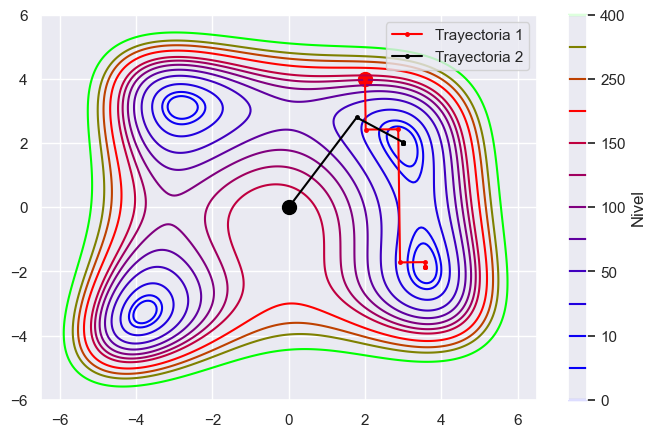

In [18]:
epsilonmaquina = np.finfo(float).eps

print('--------- x0 = (2., 4.) ---------')
x0 = np.array([2,4], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200

xk, k, bres, xks1 = desc_max(f=f_Himmelblau, gradf=grad_Himmelblau, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks1)

print('\n--------- x0 = (0., 0.) ---------')
x0 = np.array([0,0], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks2 = desc_max(f=f_Himmelblau, gradf=grad_Himmelblau, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks2)


ax = contornosFnc2D(f_Himmelblau, xleft=-6.5, xright=6.5, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300, 400],
            secuencia1 = xks1, secuencia2 = xks2)
ax.scatter(2,4, s = 100, c = '#FF0000')
ax.scatter(0,0, s = 100, c = '#000000')
plt.legend()
plt.show()

**Función de Beale con $\mathbf{x}_0 = (2.,3.)$ y $\mathbf{x}_0 = (2.,4.):$**

--------- x0 = (2., 3.) ---------


xk   = [2.99949465 0.49986994]
k    = 476
bres = True

--------- x0 = (2., 4.) ---------
xk   = [-5.01586285  1.16967717]
k    = 10000
bres = False
xks  =
 [[ 2.00000000e+00  4.00000000e+00]
 [-2.70126329e-03  1.00419129e+00]
 [-1.19364323e-01  1.07960976e+00]
 ...
 [-5.01563749e+00  1.16968379e+00]
 [-5.01569822e+00  1.16978052e+00]
 [-5.01586285e+00  1.16967717e+00]]
Para este caso, no hay convergencia del método.


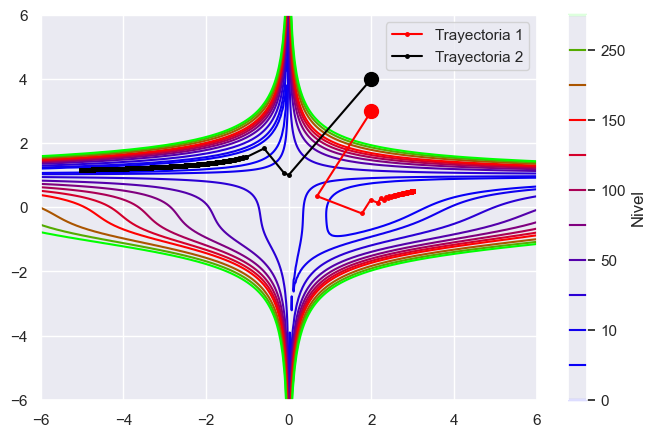

In [19]:
epsilonmaquina = np.finfo(float).eps

print('--------- x0 = (2., 3.) ---------')
x0 = np.array([2.,3.], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks1 = desc_max(f=f_Beale, gradf=grad_Beale, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
#print('xks  =\n', xks1)

print('\n--------- x0 = (2., 4.) ---------')
x0 = np.array([2.,4.], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks2 = desc_max(f=f_Beale, gradf=grad_Beale, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks2)
print('Para este caso, no hay convergencia del método.')

ax = contornosFnc2D(f_Beale, xleft=-6, xright=6, ybottom=-6, ytop=6,
            levels=[0, 5, 10, 25, 50, 75, 100, 125, 150, 200, 250, 300],
            secuencia1=xks1, secuencia2=xks2)
ax.scatter(2,3, s = 100, c = '#FF0000')
ax.scatter(2,4, s = 100, c = '#000000')
plt.legend()
plt.show()

**Función de Rosenbrock con $\mathbf{x}_0 = (-2.1,4.5)$ y $\mathbf{x}_0 = (-1.2,1.0)$:**

--------- x0 = (-2.1, 4.5) ---------
xk   = [1.00299198 1.00602056]
k    = 3179
bres = True
xks  =
 [[-2.1         4.5       ]
 [-2.11854997  4.49518877]
 [-1.75812879  3.10823099]
 ...
 [ 1.00300269  1.00604215]
 [ 1.00300852  1.00603584]
 [ 1.00299198  1.00602056]]

--------- x0 = (-1.2, 1.0) ---------
xk   = [1.00359375 1.00722286]
k    = 8321
bres = True
xks  =
 [[-1.2         1.        ]
 [ 1.44087777  2.07790929]
 [ 1.44105651  2.07746871]
 ...
 [ 1.00359951  1.00723445]
 [ 1.00360273  1.00722651]
 [ 1.00359375  1.00722286]]


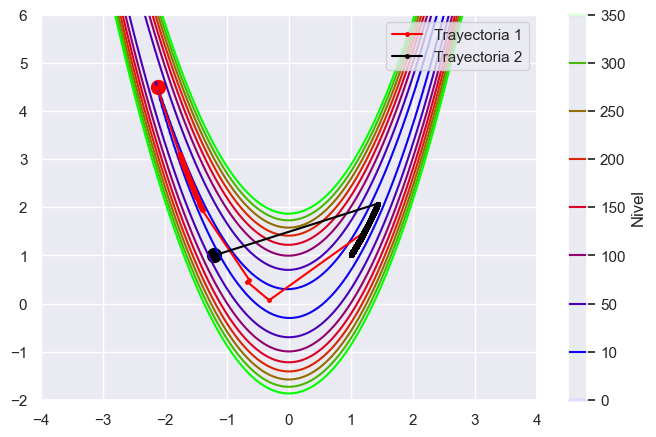

In [20]:
epsilonmaquina = np.finfo(float).eps

print('--------- x0 = (-2.1, 4.5) ---------')
x0 = np.array([-2.1,4.5], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks1 = desc_max(f=f_Rosenbrock, gradf=grad_Rosenbrock, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks1)

print('\n--------- x0 = (-1.2, 1.0) ---------')
x0 = np.array([-1.2,1.0], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks2 = desc_max(f=f_Rosenbrock, gradf=grad_Rosenbrock, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks2)


ax = contornosFnc2D(f_Rosenbrock, xleft=-4, xright=4, ybottom=-2, ytop=6,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = xks1, secuencia2 = xks2)
ax.scatter(-2.1,4.5, s = 100, c = '#FF0000')
ax.scatter(-1.2,1.0, s = 100, c = '#000000')
plt.legend()
plt.show()

**Función de Rosenbrock con $\mathbf{x}_0 = (-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5)$ y $\mathbf{x}_0 = (-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0)$:**

In [21]:
epsilonmaquina = np.finfo(float).eps

print('--------- x0 = (-2.1, 4.5) ---------')
x0 = np.array([-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5,-2.1,4.5], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks1 = desc_max(f=f_Rosenbrock, gradf=grad_Rosenbrock, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks1)

print('\n--------- x0 = (-1.2, 1.0) ---------')
x0 = np.array([-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0,-1.2,1.0], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/2)
N = 10000
Ngs = 200
xk, k, bres, xks2 = desc_max(f=f_Rosenbrock, gradf=grad_Rosenbrock, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks2)

--------- x0 = (-2.1, 4.5) ---------
xk   = [0.99995899 0.99992094 0.99983561 0.99967853 0.99934617 0.99869926
 0.99738468 0.9947707  0.98953729 0.97913411]
k    = 6599
bres = True
xks  =
 []

--------- x0 = (-1.2, 1.0) ---------
xk   = [0.99995795 0.99991915 0.99983148 0.99967099 0.99933021 0.99866816
 0.99732159 0.99464523 0.98928657 0.97863694]
k    = 6472
bres = True
xks  =
 []


## **3.3.-**

Repita la prueba para función de Rosenbrock usando el punto inicial $\mathbf{x}_0 = (-2.1, 4.5)$ usando $\tau_2 = \epsilon_m^{1/4}$ y $N_{gs}=50$ para relajar las condiciones de paro del método de la sección dorada y ver si podemos terminar más rápido. Escriba un comentario sobre si conviene hacer esto o cuando no conviene hacerlo. 

--------- x0 = (-2.1, 4.5) ---------


xk   = [1.00291926 1.00584275]
k    = 8052
bres = True
xks  =
 [[-2.1         4.5       ]
 [-2.11943433  4.4949594 ]
 [-2.11838937  4.49479375]
 ...
 [ 1.00293071  1.00586513]
 [ 1.00292195  1.00586622]
 [ 1.00291926  1.00584275]]


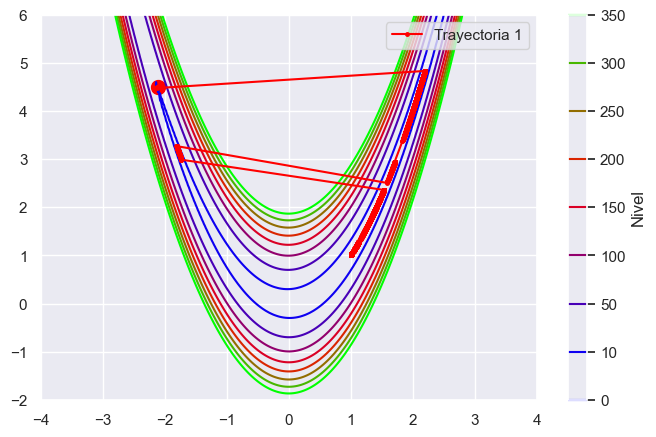

In [22]:
epsilonmaquina = np.finfo(float).eps

print('--------- x0 = (-2.1, 4.5) ---------')
x0 = np.array([-2.1,4.5], dtype = float)
n = len(x0)
tau1 = np.sqrt(n)*epsilonmaquina**(1/3)
tau2 = epsilonmaquina**(1/4)
N = 10000
Ngs = 50
xk, k, bres, xks1 = desc_max(f=f_Rosenbrock, gradf=grad_Rosenbrock, x0=x0,
            tol1=tau1, tol2=tau2, iter=N, iter_gs=Ngs)
print('xk   =', xk)
print('k    =', k)
print('bres =', bres)
print('xks  =\n', xks1)

ax = contornosFnc2D(f_Rosenbrock, xleft=-4, xright=4, ybottom=-2, ytop=6,
            levels=[0, 10, 50, 100, 150, 200, 250, 300, 350],
            secuencia1 = xks1)
ax.scatter(-2.1,4.5, s = 100, c = '#FF0000')
plt.legend()
plt.show()

>Consideremos los resultados de la primera y segunda estimación para el punto $(-2.1,4.5)$, respectivamente:
>
>$x_k = [1.00299198 1.00602056]$, $k= 3179$
>
>$x_k = [1.00291926 1.00584275]$, $k= 8052$
>
>Para este ejemplo, no es conveniente hacer esto, ya que, aunque ambos convergen, al momento de hacer las modificaciones, el número de iteraciones aumenta en casi $5000$ iteraciones, lo cual es una afectación importante al rendimiento del algoritmo. Además, se puede notar del gráfico de contornos de nivel que se producen saltos importantes en la estimación de la solución, lo cual rompe la estabilidad del método.

---

# **4.- Ejercicio 4:**

---

Sea $f(x) = (x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia 

$$ x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k) $$ 

con $0 < \alpha < 1$, para obtener el minimizador de la función $f(x)$. ¿Tiene este algoritmo la propiedad de descenso, es decir, $f(x_{k+1}) < f(x_{k})$ a partir de cierto $k$? ¿Es el algoritmo globalmente convergente?

>$\textbf{DEMOSTRACIÓN:}\\$
>
>Se tiene que $f(x) = (x-1)^{2}$, entonces $f'(x) = 2(x-1)$, con esto,
>\begin{align*}
>x_{k+1} &= x_{k} - \frac{\alpha}{2^{k}} (2(x_{k}-1))\\
>&= x_{k} - \frac{\alpha}{2^{k-1}}(x_{k} - 1)
>\end{align*}
>Revisando la diferencia $f(x_{k+1}) - f(x_{k})$:
>\begin{align*}
> f(x_{k+1}) - f(x_{k}) &= (x_{k+1}-1)^{2} - (x_{k}-1)^{2}\\
>&= \left(x_{k} - \frac{\alpha}{2^{k-1}}(x_{k} - 1) - 1\right)^{2} - (x_{k}-1)^{2}\\
>&= \left( (x_{k}-1) - \frac{\alpha}{2^{k-1}}(x_{k} - 1) \right)^{2} - (x_{k}-1)^{2}\\
>&= \left( (x_{k}-1) \left( 1- \frac{\alpha}{2^{k-1}} \right)  \right)^{2} - (x_{k}-1)^{2}\\
>&=(x_{k}-1)^{2} \left( 1- \frac{\alpha}{2^{k-1}} \right)^{2} - (x_{k}-1)^{2}\\
>&=(x_{k}-1)^{2} \left( \left( 1- \frac{\alpha}{2^{k-1}} \right)^{2} - 1 \right)
>\end{align*}
> Entonces,
>\begin{align*}
>&f(x_{k+1}) - f(x_{k}) <0\\
> \Leftrightarrow & \quad (x_{k}-1)^{2} \left( \left( 1- \frac{\alpha}{2^{k-1}} \right)^{2} - 1 \right) < 0 \\
> \Leftrightarrow & \quad \left( 1- \frac{\alpha}{2^{k-1}} \right)^{2} - 1 < 0 \\
> \Leftrightarrow & \quad 1 - \frac{2\alpha}{2^{k-1}} + \frac{\alpha^{2}}{2^{2(k-1)}} - 1 < 0 \\
> \Leftrightarrow & \quad \frac{\alpha^{2}}{2^{2(k-1)}} - \frac{2\alpha}{2^{k-1}} < 0\\
> \Leftrightarrow & \quad \frac{\alpha}{2^{k-1}} - 2 < 0 \\
> \Leftrightarrow & \quad \frac{\alpha}{2^{k-1}} < 2 \\
> \Leftrightarrow & \quad 2^{k-1} > \frac{\alpha}{2} \\
> \Leftrightarrow & \quad (k-1)\ln{2} > \ln{\alpha} - \ln{2} \\
> \Leftrightarrow & \quad k > \frac{\ln{\alpha}}{\ln{2}}
>\end{align*}
>Como $0<\alpha<1$, entonces $\ln{\alpha} < 0$, entonces $\frac{\ln{\alpha}}{\ln{2}} < 0$ y se tiene que $f(x_{k+1}) < f(x_{k})$ $\forall k\geq 0$, es decir, se tiene la propiedad de descenso para $k\geq 0$. Sin embargo, podemos notar que si $k \rightarrow \infty$, entonces $||x_{k-1} - x_{k}||\rightarrow0$ y si $f$ es continua, entonces $||f(x_{k-1}) - f(x_{k})||\rightarrow 0$ cuando $k \rightarrow \infty$. Por este motivo, en general no se puede asegurar la convergencia global.